In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [3]:
tit = pd.read_csv('titanic.csv')

In [4]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#we do not need pasengerid,names,cabin 
tit.drop(["PassengerId","Name","Cabin"],axis=1,inplace=True)

In [6]:
tit

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


In [7]:
tit.shape

(418, 9)

In [8]:
tit.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [9]:
tit.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [10]:
tit.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#mean age is 30 and mean fare is 35 ..replacing null values with these mean values
tit["Age"].fillna(30, inplace = True)
 

In [12]:
tit["Fare"].fillna(35, inplace = True)

In [13]:
tit.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [15]:
#checking tha value counts of each column
for i in tit.columns:
    print(tit[i].value_counts())
    print("\n")
# no blanks in any column    


0    266
1    152
Name: Survived, dtype: int64


3    218
1    107
2     93
Name: Pclass, dtype: int64


male      266
female    152
Name: Sex, dtype: int64


30.0    101
24.0     17
21.0     17
22.0     16
18.0     13
       ... 
7.0       1
60.5      1
26.5      1
76.0      1
34.5      1
Name: Age, Length: 79, dtype: int64


0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


PC 17608            5
113503              4
CA. 2343            4
C.A. 31029          3
16966               3
                   ..
SC/A4 23568         1
350026              1
STON/O2. 3101270    1
242963              1
250650              1
Name: Ticket, Length: 363, dtype: int64


7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 170, dtype: int64


S 

0    266
1    152
Name: Survived, dtype: int64


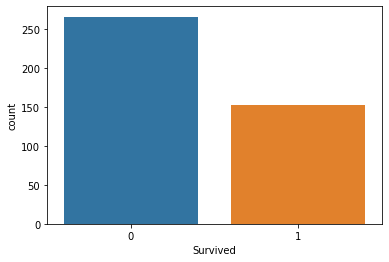

In [16]:
sns.countplot(x="Survived",data=tit)
print(tit["Survived"].value_counts())

3    218
1    107
2     93
Name: Pclass, dtype: int64


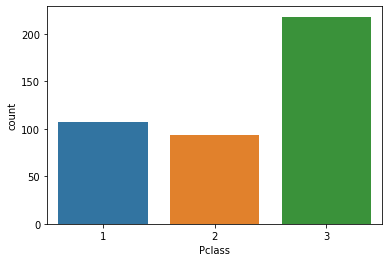

In [17]:
sns.countplot(x="Pclass",data=tit)
print(tit["Pclass"].value_counts())

male      266
female    152
Name: Sex, dtype: int64


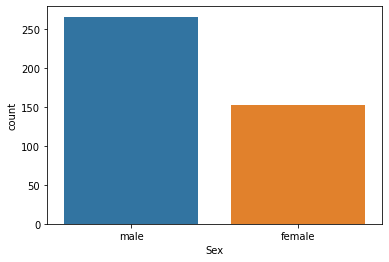

In [18]:
sns.countplot(x="Sex",data=tit)
print(tit["Sex"].value_counts())

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64


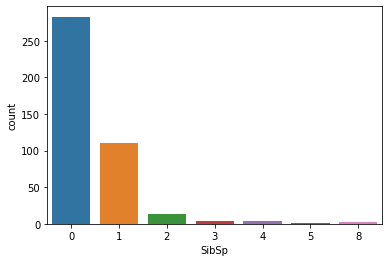

In [19]:
sns.countplot(x="SibSp",data=tit)
print(tit["SibSp"].value_counts())

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


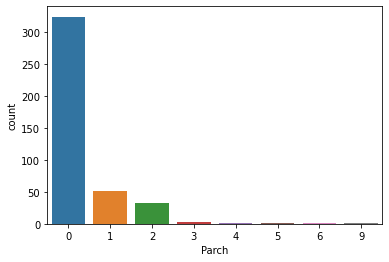

In [20]:
sns.countplot(x="Parch",data=tit)
print(tit["Parch"].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


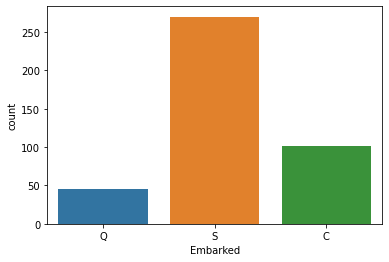

In [21]:
sns.countplot(x="Embarked",data=tit)
print(tit["Embarked"].value_counts())

<AxesSubplot:ylabel='Frequency'>

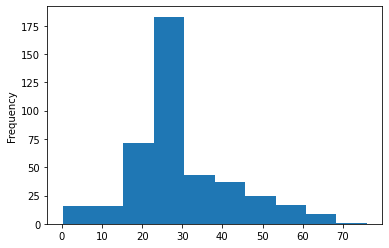

In [22]:
tit['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

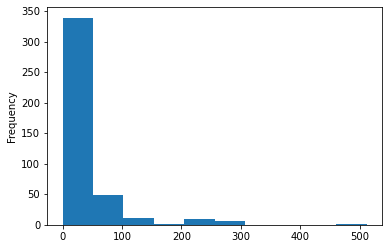

In [23]:
tit['Fare'].plot.hist()

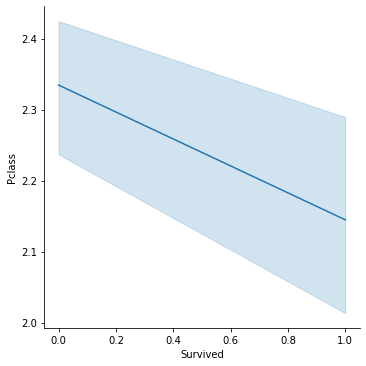

In [31]:
sns.relplot(
    data=tit, kind="line",
    x="Survived", y="Pclass") # survival among 1st class ticket 

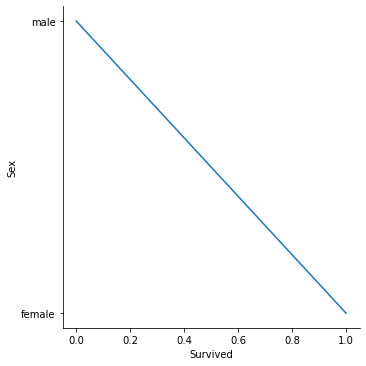

In [32]:
sns.relplot(
    data=tit, kind="line",
    x="Survived", y="Sex") # female survived more

<AxesSubplot:title={'center':'Comparision between Survived and Age'}, xlabel='Survived', ylabel='Age'>

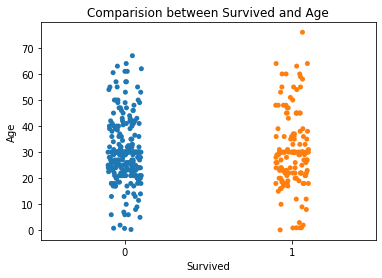

In [26]:
plt.title("Comparision between Survived and Age")
sns.stripplot(x="Survived",y="Age",data=tit)


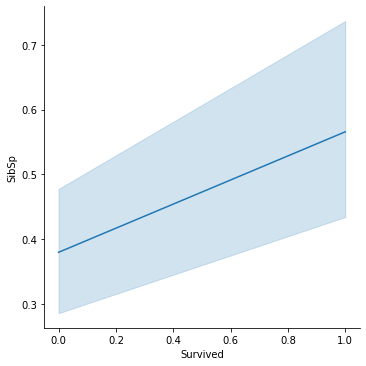

In [34]:
sns.relplot(
    data=tit, kind="line",
    x="Survived", y="SibSp")

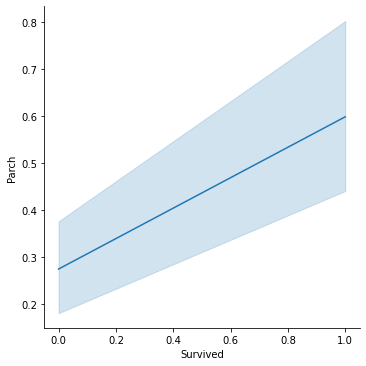

In [35]:
sns.relplot(
    data=tit, kind="line",
    x="Survived", y="Parch")

<AxesSubplot:title={'center':'Comparision between Survived and Fare'}, xlabel='Survived', ylabel='Fare'>

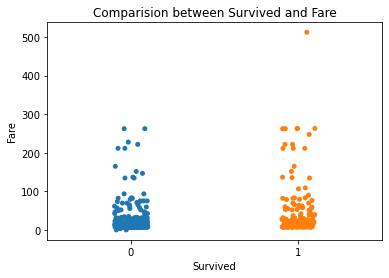

In [29]:
plt.title("Comparision between Survived and Fare")
sns.stripplot(x="Survived",y="Fare",data=tit)


C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


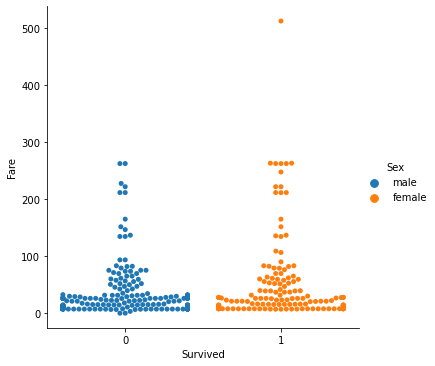

In [37]:
sns.catplot(data=tit, kind="swarm", x="Survived", y="Fare", hue="Sex")

C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


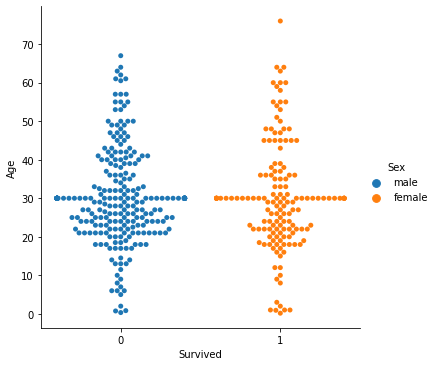

In [38]:
sns.catplot(data=tit, kind="swarm", x="Survived", y="Age", hue="Sex")

In [40]:
tit

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,30.0,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,30.0,0,0,359309,8.0500,S


In [41]:
#ticket no is not needed
tit.drop(["Ticket"],axis=1,inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
tit["Sex"].unique()

array(['male', 'female'], dtype=object)

In [45]:
lb=LabelEncoder()

In [46]:
tit["Sex"]=lb.fit_transform(tit["Sex"])

In [47]:
tit["Sex"].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [48]:
tit["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [49]:
tit["Embarked"]=lb.fit_transform(tit["Embarked"])

In [50]:
tit["Embarked"].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [51]:
tit

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.0,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,30.0,0,0,8.0500,2


In [52]:
tit.skew()# some categorical data have skewness which need not to be removed

Survived    0.568991
Pclass     -0.534170
Sex        -0.568991
Age         0.526030
SibSp       4.168337
Parch       4.654462
Fare        3.691679
Embarked   -0.873825
dtype: float64

In [53]:
cor=tit.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,0.000662,0.099943,0.159120,0.191403,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.443234,0.001087,0.018721,-0.576642,0.227983
Sex,-1.000000,0.108615,1.000000,-0.000662,-0.099943,-0.159120,-0.191403,0.076281
Age,0.000662,-0.443234,-0.000662,1.000000,-0.078870,-0.044980,0.328365,-0.157229
SibSp,0.099943,0.001087,-0.099943,-0.078870,1.000000,0.306895,0.171501,0.052708
Parch,0.159120,0.018721,-0.159120,-0.044980,0.306895,1.000000,0.230012,0.054577
Fare,0.191403,-0.576642,-0.191403,0.328365,0.171501,0.230012,1.000000,-0.257050
Embarked,-0.076281,0.227983,0.076281,-0.157229,0.052708,0.054577,-0.257050,1.000000


In [ ]:
#Checking Outliers

<AxesSubplot:>

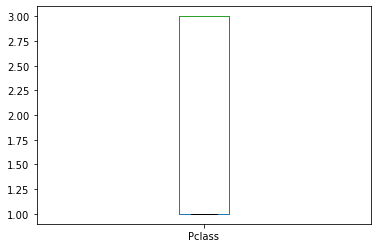

In [59]:
tit["Pclass"].plot.box()

<AxesSubplot:>

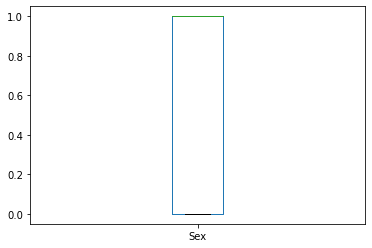

In [60]:
tit["Sex"].plot.box()

<AxesSubplot:>

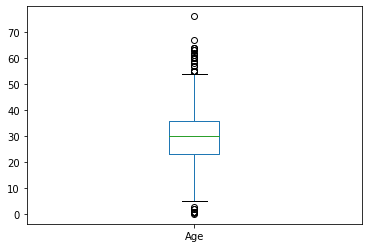

In [61]:
tit["Age"].plot.box()

<AxesSubplot:>

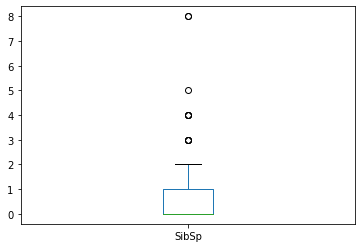

In [62]:
tit["SibSp"].plot.box()

<AxesSubplot:>

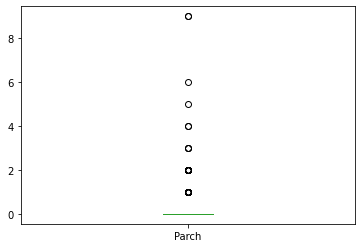

In [63]:
tit["Parch"].plot.box()

<AxesSubplot:>

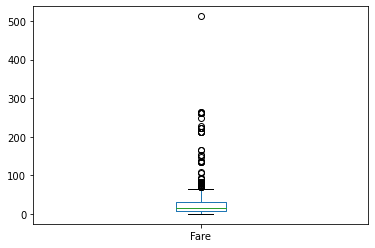

In [64]:
tit["Fare"].plot.box()

<AxesSubplot:>

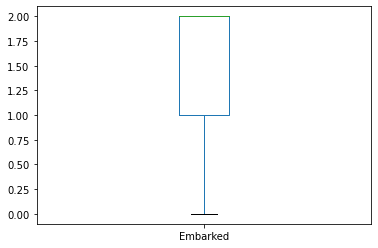

In [65]:
tit["Embarked"].plot.box()

In [ ]:
#SOME TERMS WILL BE USED DURING PREDICTION
#accuracy is the no of correct predictions/total no of predictions
#confusion matrix shows type 1 and type 2 error
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision), shows what % of positive predictions are correct
#precision says hat % of predictions are correct
#Precision = TP/(TP + FP), it is accuracy of positive predictions
#Recall is the fraction of positive that are correctly identified
#Recall = TP/(TP+FN)
#FPR=FP/FP+TN
#TPR=TP/TP+FN, FN is False negative and TP is true Positive
#Standard scalling is done to make the datapoints generalised so the distance between them is lower

In [66]:
x = tit.drop('Survived', axis=1).copy()
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,30.0,0,0,8.0500,2


In [67]:
y = tit['Survived'].copy()
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [71]:
x_train.shape

(292, 7)

In [72]:
y_train.shape

(292,)

In [73]:
x_test.shape

(126, 7)

In [74]:
y_test.shape

(126,)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.87348191,  0.75592895,  0.33942386, ..., -0.4002477 ,
        -0.49838008, -0.47091535],
       [ 0.87348191, -1.32287566,  1.32992353, ..., -0.4002477 ,
        -0.51324731,  0.70076689],
       [-0.31581919,  0.75592895,  2.51852314, ..., -0.4002477 ,
        -0.46506149, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.65638375, ..., -0.4002477 ,
        -0.50876491,  0.70076689],
       [ 0.87348191,  0.75592895, -0.01715602, ..., -0.4002477 ,
        -0.49442122,  0.70076689],
       [ 0.87348191,  0.75592895, -0.01715602, ...,  0.61989583,
        -0.23787904, -1.64259759]])

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
lg=LogisticRegression()

In [79]:
lg.fit(x_train,y_train)

LogisticRegression()

In [80]:
pred=lg.predict(x_test)

In [81]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [82]:
accuracy_score(y_test,pred)

1.0

In [83]:
print(confusion_matrix(y_test,pred))

[[85  0]
 [ 0 41]]


In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [85]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [86]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [87]:
y_pred_prob

array([0.03181829, 0.9631305 , 0.03039635, 0.02768059, 0.93352559,
       0.03184361, 0.9302145 , 0.03312177, 0.93807134, 0.02805433,
       0.03293912, 0.94364188, 0.9440023 , 0.95761289, 0.02805433,
       0.03166254, 0.93036324, 0.03461703, 0.04116633, 0.0328595 ,
       0.02883863, 0.03783792, 0.94017818, 0.03093563, 0.94183827,
       0.93557871, 0.95553204, 0.03483925, 0.03251695, 0.03093563,
       0.02893744, 0.93646441, 0.95791132, 0.02805433, 0.93722509,
       0.03114506, 0.93475796, 0.03486906, 0.94128256, 0.06101646,
       0.93475796, 0.93918807, 0.03389053, 0.03598668, 0.03931562,
       0.02870545, 0.95545801, 0.94837909, 0.94490618, 0.02756396,
       0.02935385, 0.93485663, 0.93006127, 0.02941442, 0.03485637,
       0.94260146, 0.02805433, 0.03125859, 0.94320134, 0.03012268,
       0.02841111, 0.0315487 , 0.94944156, 0.03268022, 0.94559977,
       0.03114506, 0.02724799, 0.02846049, 0.03845447, 0.03973853,
       0.05133984, 0.03312336, 0.0278757 , 0.94398295, 0.03786

In [88]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [89]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.55294118, 0.6       , 0.64705882, 0.67058824, 0.87058824,
       0.91764706, 1.        ])

In [90]:
tpr

array([0.        , 0.02439024, 0.82926829, 0.87804878, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [91]:
thersholds

array([1.97413088, 0.97413088, 0.93485663, 0.93475796, 0.93006127,
       0.03125859, 0.03093563, 0.03012268, 0.02969353, 0.02810087,
       0.02805433, 0.02724799])

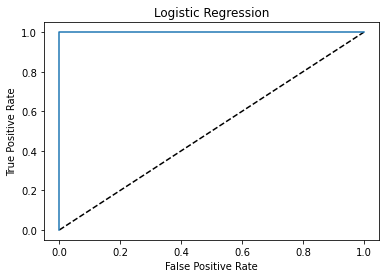

In [92]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [93]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [94]:
auc_score

1.0